# Derivación en **Python**

En esta sección aprenderemos a derivar con `Sympy` y aplicaremos este conocimiento sobre algunos ejemplos del Polinomio de Taylor.

## Derivar en **Sympy**
Para calcular simbólicamente la derivada primera de una función mediante Sympy se emplea la función *diff*. Por ejemplo 

In [6]:
import sympy as sp
x=sp.symbols('x')
f=sp.exp(x)*sp.cos(x)
d1f=sp.diff(f,x)
print('La derivada primera es: ',d1f)

La derivada primera es:  -exp(x)*sin(x) + exp(x)*cos(x)


Para calcular la derivada i-ésima

In [7]:
import sympy as sp
x=sp.symbols('x')
f=sp.exp(x)*sp.cos(x)
d2f=sp.diff(f,x,2)
print('La derivada segunda es: ',d2f)
d3f=sp.diff(f,x,3)
print('La derivada tercera es: ',d3f)

La derivada segunda es:  -2*exp(x)*sin(x)
La derivada tercera es:  -2*(sin(x) + cos(x))*exp(x)


## Uso de **sp.lambdify** 

En el resto de esta práctica, así como en el resto del curso, necesitaremos que una función simbólica de **Sympy** actúe sobre variables que almacenen números en coma flotante o arrays de **Numpy**. En concreto, y aunque las utilidades de este comando son mucho más amplias, lo necesitaremos para representar las funciones obtenidas en **Matplotlib**. 

Esto se consigue utilizando la función `sp.lambdify`.

Mostramos a continuación, sobre un ejemplo, su uso. En él denotaremos *f* la función en Sympy y *fn* la función numérica generada a partir de ésta con `sp.lambdify`.

In [8]:
import sympy as sp
import numpy as np
x=sp.symbols('x')
# La funcion f es simbolica: no podemos evaluarla
# en variables numericas que almacenen valores en coma flotante, 
# o en arrays de numpy
f=sp.sin(x)*sp.exp(x)
# La funcion fn es numerica, y podemos evaluarla en numeros en coma flotante o en arrays de Numpy
fn=sp.lambdify(x,f)
x=np.linspace(-np.pi,np.pi,5)
print(fn(x))


[-5.29217867e-18 -2.07879576e-01  0.00000000e+00  4.81047738e+00
  2.83391752e-15]


## Ejercicio 1: polinomio de Taylor

El objetivo de este ejercicio es programar la función *series* de Sympy, que sirve para calcular el polinomio de Taylor.

El objetivo es escribir una función `Python` que calcule de forma simbólica el polinomio de Taylor de una función dada. Como argumentos de entrada debe recibir la función, $f$, el centro de Taylor, $x_{0}$, y el orden del polinomio, $n$. 

La función debe devolver el polinomio de Taylor y la función que proporciona el resto de Taylor.

In [9]:
# Codigo aqui

import sympy as sp

x,t=sp.symbols('x,t')

# p: polinomio de Taylor
# R: resto en valor absoluto
def taylor(f,x0,n):
    p=0
    for i in range(n+1):
        p+=sp.diff(f,x,i).subs(x,x0)/sp.factorial(i)*(x-x0)**i
    R=sp.diff(f,x,n+1).subs(x,t)/sp.factorial(n+1)*(x-x0)**(n+1)
    return p,R



Ahora vamos a emplear la función anterior para calcular el polinomio de Taylor de grado 5 de la función 

$$f(x)=\sin(x)-\cos(x),$$
centrado en $x_0=0$.

In [10]:
# Codigo aqui
import sympy as sp
x=sp.symbols('x')
f=sp.sin(x)-sp.cos(x)
p,R=taylor(f,0,5)
print('Polinomio de Taylor: \n',p,'\n\n Resto de Taylor: \n',R)

Polinomio de Taylor: 
 x**5/120 - x**4/24 - x**3/6 + x**2/2 + x - 1 

 Resto de Taylor: 
 x**6*(-sin(t)/720 + cos(t)/720)


A continuación vamos a representar, empleando **Matplotlib**, la función *f* junto a su polinomio de Taylor, *p*. 

También aproximaremos el valor de $f(\pi)$ mediante dicho polinomio de Taylor y representaremos (mediante un segmento en rojo) la diferencia entre el valor exacto y el aproximado mediante el polinomio de Taylor. 

Representación de la función, el polinomio de Taylor y el residuo

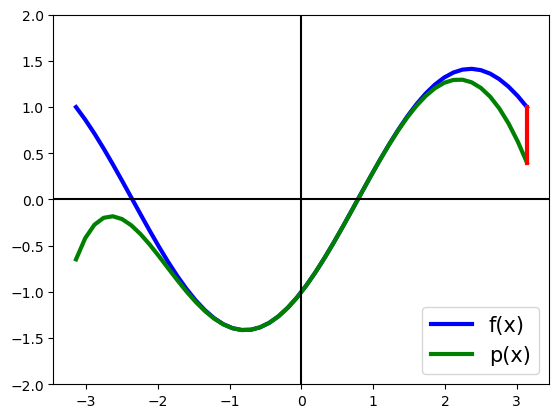

In [11]:
# Codigo aqui
import numpy as np
import matplotlib.pyplot as plt
x=sp.symbols('x')
fn=sp.lambdify(x,f)
pn=sp.lambdify(x,p)
x=np.linspace(-np.pi,np.pi)
plt.plot(x,fn(x),label='f(x)', lw='3',c='b')
plt.plot(x,pn(x),label='p(x)', lw='3',c='g')
plt.plot([np.pi,np.pi],[fn(np.pi),pn(np.pi)],lw='3',c='r')
plt.axhline(0,color='k')
plt.axvline(0,color='k')
plt.ylim(-2,2)
plt.legend(loc='lower right',fontsize=15)
plt.show()

Ahora vamos a calcular el valor absoluto del resto de Taylor:

$$
|R(x)|=|f(x)-p_n(x)|
$$
así como la estimación (cota superior), a partir de la fórmula del resto que nos proporciona el Teorema de Taylor: 

$$
|R(x)|\leq \max_{t \in [0,x]} \dfrac{|f^{n+1}(t)|}{(n+1)!}|x-0|^{n+1}.
$$
Para calcular la cota superior del resto de Taylor, debemos acotar la función $g(t)=\dfrac{|f^{n+1}(t)|}{(n+1)!}|x-0|^{n+1}$ para $x=\pi$, en el intervalo correspondiente. 

Vamos a realizar esta acotación haciendo algo de *trampa*: utilizaremos **Scipy**. Concretamente su función `optimize.fminbound`, que calcula el mínimo de una función real de variable real en un intervalo. 

También haremos esta acotación gráficamente: representaremos la gráfica de $g$ (el valor absoluto del resto de Taylor) en función de $t\in[0,\pi]$ y buscaremos su máximo.


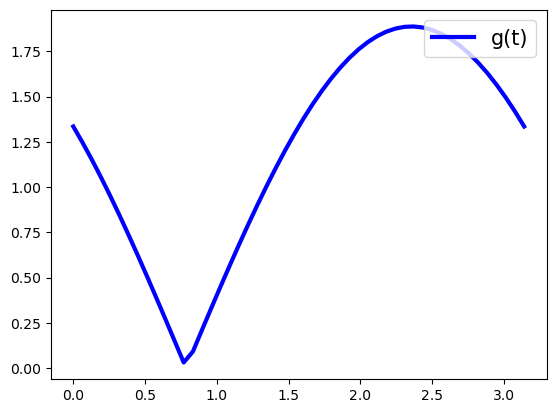

El error es menor o igual que:  1.8883467170460109
El error real es:  0.5998660124549196


In [12]:
from scipy import optimize
import numpy as np
x=sp.symbols('x')

# Convertir el resto de Taylor para x=pi en una funcion numerica
# Como buscamos el maximo, multiplicamos por -1 (maximizar es minimizar el opuesto)
Rn=sp.lambdify(t,-sp.Abs(R.subs(x,sp.pi))) # Opuesto del resto
x=np.linspace(0,np.pi)
# Solucion grafica
plt.plot(x,-Rn(x),label='g(t)', lw='3',c='b')
plt.legend(loc='upper right',fontsize=15)
plt.show()
# Optimizamos el resto de Taylor
topt=optimize.fminbound(Rn, 0,np.pi)

print('El error es menor o igual que: ',-Rn(topt))
print('El error real es: ',np.abs(fn(np.pi)-pn(np.pi)))

## Ejercicio 2: máximos

Dado un canal de sección trapezoidal de lado 2, calcular el ángulo $\alpha$ (ver dibujo) que maximiza el área de la sección del canal.

<img src="../../images/cap5_canal.svg" width="300"/>

1. A mano. Obtener la función que proporciona el área del canal en función del ángulo $ \alpha $
2. Simbólicamente: con **Sympy**.
3. Numéricamente mediante el método de Newton con error menor que $ 10^{-4} $.

In [13]:
# 2. Resolvemos el problema utilizando Sympy
x,xn=sp.symbols('x,xn')
# Funcion que describe el area de la seccion en funcion del angulo
f=4*sp.sin(x)*(1+sp.cos(x))
d1f=sp.diff(f,x)
d1fn=sp.lambdify(x,d1f)
alphamax=sp.solve(d1f)
print('La sección máxima se alcanza con ángulo: ',float(alphamax[1]))


La sección máxima se alcanza con ángulo:  1.0471975511965979


In [14]:
# 3. Aproximamos el máximo con el método de Newton
maxit=100
eps=1e-4
d2fn=sp.diff(d1f,x)
d2fn=sp.lambdify(x,d2f)
xn=np.pi/2
for i in range(0,maxit):
    res=d1fn(xn)/d2fn(xn)
    xn=xn-res
    if (np.abs(res)<eps):
        break
print('La sección máxima se alcanza con ángulo: ',xn)

La sección máxima se alcanza con ángulo:  0.9650678568332388
